In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts), np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts), np.random.normal(6, 2, n_pts)]).T
X = np.vstack([Xa, Xb])
Y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

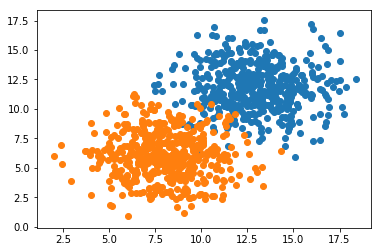

In [3]:
plt.show()

In [4]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2,), activation='sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x = X, y = Y, verbose=1, batch_size=50, epochs=100, shuffle='true')

Epoch 1/100
1000/1000 [==============================] - 0s 132us/step - loss: 1.4230 - acc: 0.5550
Epoch 2/100
1000/1000 [==============================] - 0s 14us/step - loss: 0.6249 - acc: 0.6120
Epoch 3/100
1000/1000 [==============================] - 0s 21us/step - loss: 0.4458 - acc: 0.8290
Epoch 4/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.3836 - acc: 0.8950
Epoch 5/100
1000/1000 [==============================] - 0s 22us/step - loss: 0.3405 - acc: 0.9050
Epoch 6/100
1000/1000 [==============================] - 0s 20us/step - loss: 0.3076 - acc: 0.9270
Epoch 7/100
1000/1000 [==============================] - 0s 20us/step - loss: 0.2883 - acc: 0.9320
Epoch 8/100
1000/1000 [==============================] - 0s 19us/step - loss: 0.2609 - acc: 0.9390
Epoch 9/100
1000/1000 [==============================] - 0s 26us/step - loss: 0.2345 - acc: 0.9580
Epoch 10/100
1000/1000 [==============================] - 0s 20us/step - loss: 0.2189 - acc: 0.9630
Epoch 11

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
# plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'])

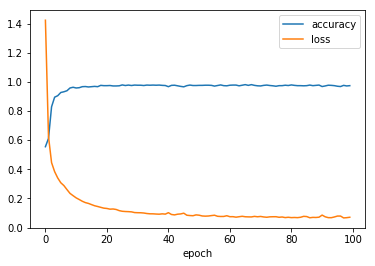

In [9]:
plt.show()

In [13]:
def plot_decision_boundary(x, y, model):
    x_span = np.linspace(min(x[:, 0]) - 1, max(x[:, 0]) + 1, 50)
    y_span = np.linspace(min(x[:, 1]) - 1, max(x[:, 1]) + 1, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

In [14]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

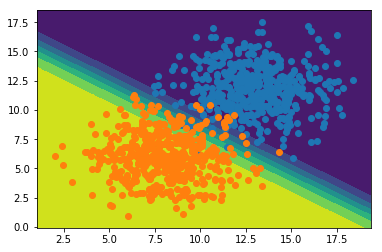

In [15]:
plt.show()

[[0.99910235]]


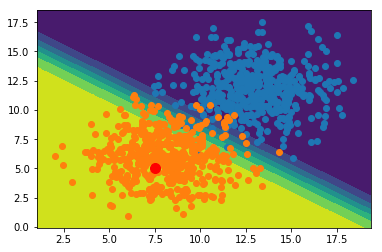

In [24]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])
x = 7.5
y = 5
point = np.array([[x, y]])
predictoin = model.predict(point)
plt.plot([x], [y], marker = 'o', markersize = 10, color = 'red')
print(predictoin)
plt.show()